## Intro to using beautiful soup to scrape web football data

### Install Beautiful Soup

In [3]:
# pip install beautifulsoup4


     |████████████████████████████████| 97 kB 13.1 MB/s            
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## We will now want to import all the necessary packages require for scraping and analysis:

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
# import klib as kb
import seaborn as sb
import matplotlib.pyplot as plt
# import wes
import matplotlib as mpl
import warnings
import numpy as np
from math import pi
from urllib.request import urlopen


### The first function I have written is the get_player_data function. All you have to do is pass the url of the player on FBRef into this function and it will return a pandas data-frame, which can be used for individual players analysis or concatenated to any number of calls from this function (if you are planning to store a data-frame with multiple players in it).

In [6]:
def get_player_data(x):
    warnings.filterwarnings("ignore")
    url = "https://fbref.com/en/players/f874dd44/Hector-Bellerin"
    page =requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    name = [element.text for element in soup.find_all("span")]
    name = name[7]
    metric_names = []
    metric_values = []
    remove_content = ["'", "[", "]", ","]
    for row in soup.findAll('table')[0].tbody.findAll('tr'):
        first_column = row.findAll('th')[0].contents
        metric_names.append(first_column)
    for row in soup.findAll('table')[0].tbody.findAll('tr'):
        first_column = row.findAll('td')[0].contents
        metric_values.append(first_column)

    metric_names = [item for sublist in metric_names for item in sublist]
    metric_values = [item for sublist in metric_values for item in sublist]

    df_player = pd.DataFrame()
    df_player['Name'] = name[0]
    for item in metric_names:
        df_player[item] = []

    name = name
    non_penalty_goals = (metric_values[0])
    npx_g = metric_values[1]
    shots_total = metric_values[2]
    assists = metric_values[3]
    x_a = metric_values[4]
    npx_g_plus_x_a = metric_values[5] 
    shot_creating_actions = metric_values[6] 
    passes_attempted = metric_values[7] 
    pass_completion_percent = metric_values[8] 
    progressive_passes = metric_values[9] 
    progressive_carries = metric_values[10] 
    dribbles_completed = metric_values[11] 
    touches_att_pen = metric_values[12]
    progressive_passes_rec = metric_values[13] 
    pressures = metric_values[14] 
    tackles = metric_values[15] 
    interceptions = metric_values[16] 
    blocks = metric_values[17]
    clearances = metric_values[18]
    aerials_won = metric_values[19]
    df_player.loc[0] = [name, non_penalty_goals, npx_g, shots_total, assists, x_a, npx_g_plus_x_a, shot_creating_actions, passes_attempted, pass_completion_percent,
                        progressive_passes, progressive_carries, dribbles_completed, touches_att_pen, progressive_passes_rec, pressures, tackles, interceptions, blocks,
                        clearances, aerials_won] 
    return df_player

In [7]:
get_player_data("https://fbref.com/en/players/70d74ece/Karim-Benzema")

,Name,Non-Penalty Goals,npxG,Shots Total,Assists,xA,npxG+xA,Shot-Creating Actions,Passes Attempted,Pass Completion %,...,Progressive Carries,Dribbles Completed,Touches (Att Pen),Progressive Passes Rec,Pressures,Tackles,Interceptions,Blocks,Clearances,Aerials won
0,Karim Benzema,0.77,0.53,3.89,0.32,0.29,0.82,3.95,42.94,84.7%,...,6.35,1.20,7.50,8.02,11.07,0.47,0.45,0.38,0.59,0.70


In [11]:
def compare_players_data(x, y):
    
    warnings.filterwarnings("ignore")

    url_x = x
    url_y = y

    page_x =requests.get(url_x)
    page_y =requests.get(url_y)

    soup_x = BeautifulSoup(page_x.content, 'html.parser')
    soup_y = BeautifulSoup(page_y.content, 'html.parser')

    name_x = [element.text for element in soup_x.find_all("span")]
    name_y = [element.text for element in soup_y.find_all("span")]

    name_x = name_x[7]
    name_y = name_y[7]

    metric_names_x = []
    metric_names_y = []

    metric_values_x = []
    metric_values_y = []

    remove_content = ["'", "[", "]", ",", "%"]

    for row in soup_x.findAll('table')[0].tbody.findAll('tr'):
        first_column_x = row.findAll('th')[0].contents
        metric_names_x.append(first_column_x)
        
    for row in soup_y.findAll('table')[0].tbody.findAll('tr'):
        first_column_y = row.findAll('th')[0].contents
        metric_names_y.append(first_column_y)
        
    for row in soup_x.findAll('table')[0].tbody.findAll('tr'):
        first_column_x_x = row.findAll('td')[0].contents
        metric_values_x.append(first_column_x_x)

    for row in soup_y.findAll('table')[0].tbody.findAll('tr'):
        first_column_y_y = row.findAll('td')[0].contents
        metric_values_y.append(first_column_y_y)
        


    metric_values_x  = [item for sublist in metric_values_x  for item in sublist]
    metric_values_y  = [item for sublist in metric_values_y  for item in sublist]

    metric_names_x  = [item for sublist in metric_names_x  for item in sublist]
    metric_names_y  = [item for sublist in metric_names_y  for item in sublist]


    df_player_1 = pd.DataFrame()

    df_player_2 = pd.DataFrame()

    df_player_1['Name'] = name_x[0]
    for item in metric_names_x:
        df_player_1[item] = []



    df_player_2['Name'] = name_y[0]
    for item in metric_names_y:
        df_player_2[item] = []
 


    name_x = name_x
    non_penalty_goals_x = (metric_values_x[0])
    npx_g_x = metric_values_x[1]
    shots_total_x = metric_values_x[2]
    assists_x = metric_values_x[3]
    x_a_x = metric_values_x[4]
    npx_g_plus_x_a_x = metric_values_x[5] 
    shot_creating_actions_x = metric_values_x[6] 
    passes_attempted_x = metric_values_x[7] 
    pass_completion_percent_x = metric_values_x[8] 
    progressive_passes_x = metric_values_x[9] 
    progressive_carries_x = metric_values_x[10] 
    dribbles_completed_x = metric_values_x[11] 
    touches_att_pen_x = metric_values_x[12]
    progressive_passes_rec_x = metric_values_x[13] 
    pressures_x = metric_values_x[14] 
    tackles_x = metric_values_x[15] 
    interceptions_x = metric_values_x[16] 
    blocks_x = metric_values_x[17]
    clearances_x = metric_values_x[18]
    aerials_won_x = metric_values_x[19]

    df_player_1.loc[0] = [name_x, non_penalty_goals_x, npx_g_x, shots_total_x, assists_x, x_a_x, npx_g_plus_x_a_x, shot_creating_actions_x, passes_attempted_x, pass_completion_percent_x,
                        progressive_passes_x, progressive_carries_x, dribbles_completed_x, touches_att_pen_x, progressive_passes_rec_x, pressures_x, tackles_x, interceptions_x, blocks_x,
                        clearances_x, aerials_won_x]

    name_y = name_y
    non_penalty_goals_y = (metric_values_y[0])
    npx_g_y = metric_values_y[1]
    shots_total_y = metric_values_y[2]
    assists_y = metric_values_y[3]
    x_a_y = metric_values_y[4]
    npx_g_plus_x_a_y = metric_values_y[5] 
    shot_creating_actions_y = metric_values_y[6] 
    passes_attempted_y = metric_values_y[7] 
    pass_completion_percent_y = metric_values_y[8] 
    progressive_passes_y = metric_values_y[9] 
    progressive_carries_y = metric_values_y[10] 
    dribbles_completed_y = metric_values_y[11] 
    touches_att_pen_y = metric_values_y[12]
    progressive_passes_rec_y = metric_values_y[13] 
    pressures_y = metric_values_y[14] 
    tackles_y = metric_values_y[15] 
    interceptions_y = metric_values_y[16] 
    blocks_y = metric_values_y[17]
    clearances_y = metric_values_y[18]
    aerials_won_y = metric_values_y[19]

    df_player_2.loc[0] = [name_y, non_penalty_goals_y, npx_g_y, shots_total_y, assists_y, x_a_y, npx_g_plus_x_a_y, shot_creating_actions_y, passes_attempted_y, pass_completion_percent_y,
                        progressive_passes_y, progressive_carries_y, dribbles_completed_y, touches_att_pen_y, progressive_passes_rec_y, pressures_y, tackles_y, interceptions_y, blocks_y,
                        clearances_y, aerials_won_y]

    df_player_comp = pd.concat([df_player_1, df_player_2])

    def p2f(x):
        return float(x.strip('%'))/100

    df_player_comp["Pass Completion %"] = df_player_comp["Pass Completion %"].apply(p2f)

    df_player_comp[['Non-Penalty Goals', 'npxG', 'Shots Total', 'Assists', 'xA',
        'npxG+xA', 'Shot-Creating Actions', 'Passes Attempted',
        'Pass Completion %', 'Progressive Passes', 'Progressive Carries',
        'Dribbles Completed', 'Touches (Att Pen)', 'Progressive Passes Rec',
        'Pressures', 'Tackles', 'Interceptions', 'Blocks', 'Clearances',
        'Aerials won']] = df_player_comp[['Non-Penalty Goals', 'npxG', 'Shots Total', 'Assists', 'xA',
        'npxG+xA', 'Shot-Creating Actions', 'Passes Attempted',
        'Pass Completion %', 'Progressive Passes', 'Progressive Carries',
        'Dribbles Completed', 'Touches (Att Pen)', 'Progressive Passes Rec',
        'Pressures', 'Tackles', 'Interceptions', 'Blocks', 'Clearances',
        'Aerials won']].apply(pd.to_numeric)

    fig, ax =plt.subplots(1,8, figsize=(40,5))
    sb.barplot(df_player_comp['Name'], df_player_comp['Non-Penalty Goals'], ax=ax[0]).set(title='Non Penalty Goals')
    sb.barplot(df_player_comp['Name'], df_player_comp['npxG'], ax=ax[1]).set(title='Non Penalty xG')
    sb.barplot(df_player_comp['Name'], df_player_comp['Shots Total'], ax=ax[2]).set(title='Total Shots')
    sb.barplot(df_player_comp['Name'], df_player_comp['Assists'], ax=ax[3]).set(title='Total Assists')
    sb.barplot(df_player_comp['Name'], df_player_comp['Shot-Creating Actions'], ax=ax[4]).set(title='Shot Creating Actions')
    sb.barplot(df_player_comp['Name'], df_player_comp['Pass Completion %'], ax=ax[5]).set(title='Pass Completion %')
    sb.barplot(df_player_comp['Name'], df_player_comp['Progressive Passes'], ax=ax[6]).set(title='Progressive Passes')
    sb.barplot(df_player_comp['Name'], df_player_comp['Progressive Carries'], ax=ax[7]).set(title='Progressive Carries')


    fig, ax =plt.subplots(1,8, figsize=(40,5))
    sb.barplot(df_player_comp['Name'], df_player_comp['Dribbles Completed'], ax=ax[0]).set(title='Dribbles Completed')
    sb.barplot(df_player_comp['Name'], df_player_comp['Touches (Att Pen)'], ax=ax[1]).set(title='Touches in Pen Area')
    sb.barplot(df_player_comp['Name'], df_player_comp['Aerials won'], ax=ax[2]).set(title='Aerials Won')
    sb.barplot(df_player_comp['Name'], df_player_comp['Progressive Passes Rec'], ax=ax[3]).set(title='Progressive Passes Received')
    sb.barplot(df_player_comp['Name'], df_player_comp['Pressures'], ax=ax[4]).set(title='Pressures')
    sb.barplot(df_player_comp['Name'], df_player_comp['Tackles'], ax=ax[5]).set(title='Tackles')
    sb.barplot(df_player_comp['Name'], df_player_comp['Interceptions'], ax=ax[6]).set(title='Interceptions')
    sb.barplot(df_player_comp['Name'], df_player_comp['Blocks'], ax=ax[7]).set(title='Blocks')

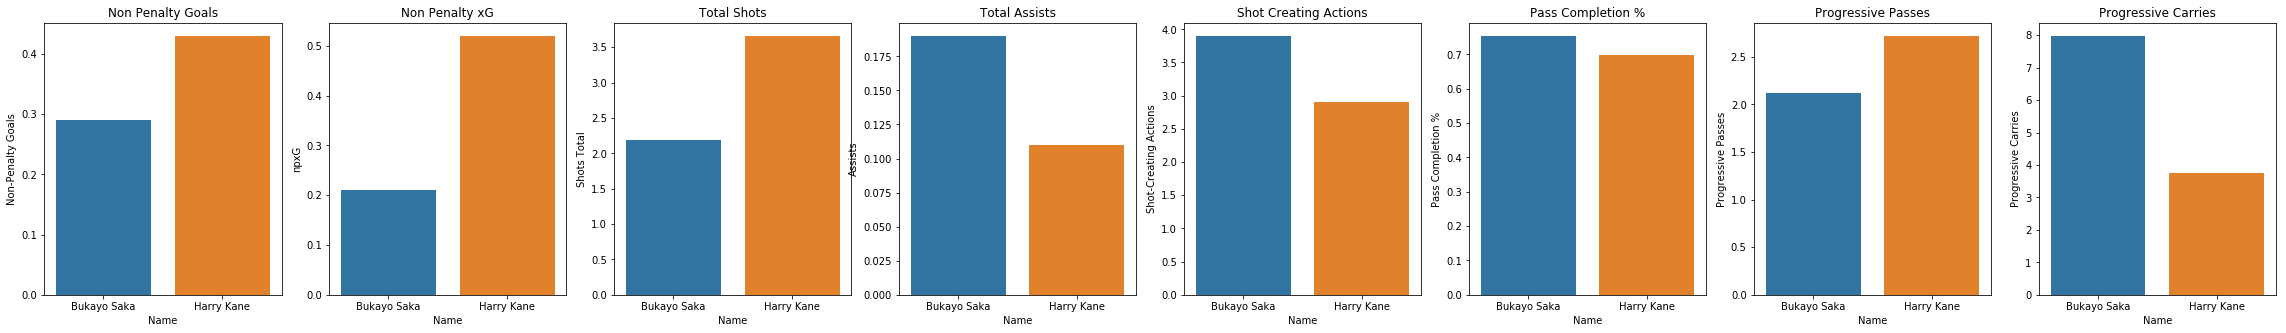

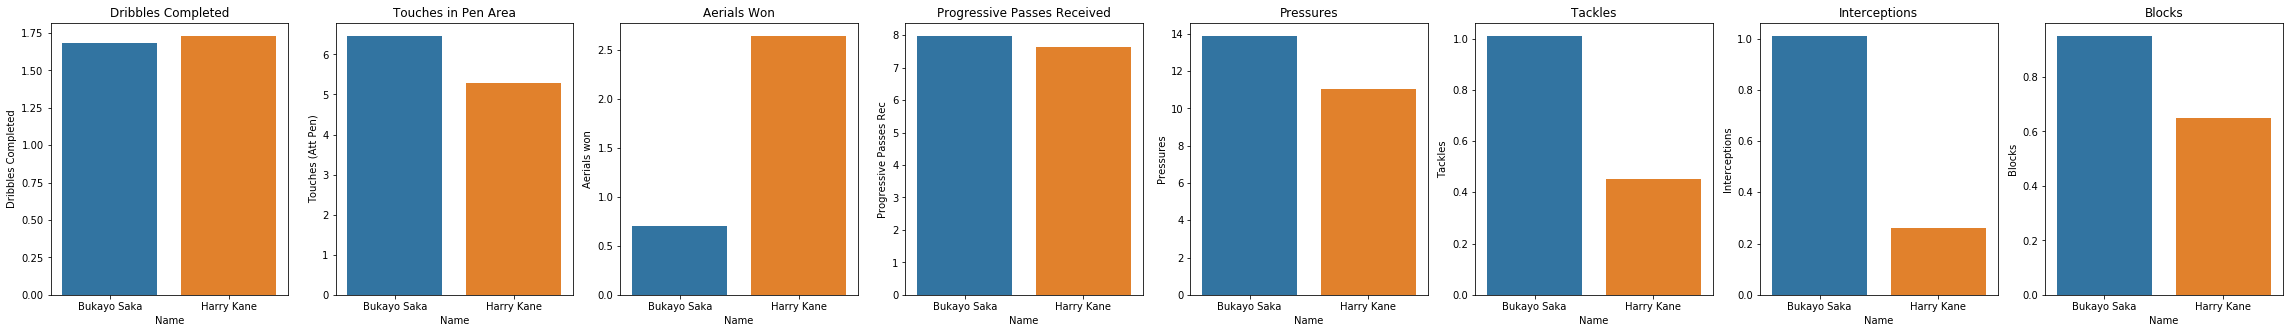

In [12]:
compare_players_data("https://fbref.com/en/players/bc7dc64d/Bukayo-Saka", "https://fbref.com/en/players/21a66f6a/Harry-Kane")

In [69]:
def compare_players_percentile(x,y):
    
    warnings.filterwarnings("ignore")
    
    url_x = x
    url_y = y
    
    page_x =requests.get(url_x)
    page_y =requests.get(url_y)
    
    soup_x = BeautifulSoup(page_x.content, 'html.parser')
    soup_y = BeautifulSoup(page_y.content, 'html.parser')
    
    name_x = [element.text for element in soup_x.find_all("span")]
    name_y = [element.text for element in soup_y.find_all("span")]
    
    name_x = name_x[7]
    name_y = name_y[7]
    
    metric_names_x = []
    metric_names_y = []
    
    metric_values_x = []
    metric_values_y = []
    
    remove_content = ["'", "[", "]", ",", "%"]
    
    for row in soup_x.findAll('table')[0].tbody.findAll('tr'):
        first_column_x = row.findAll('th')[0].contents
        metric_names_x.append(first_column_x)
        
    for row in soup_y.findAll('table')[0].tbody.findAll('tr'):
        first_column_y = row.findAll('th')[0].contents
        metric_names_y.append(first_column_y)
        
    for row in soup_x.findAll('table')[0].tbody.findAll('tr'):
        first_column_x = row.findAll('td')[1].contents
        metric_values_x.append(first_column_x)
        
    for row in soup_y.findAll('table')[0].tbody.findAll('tr'):
        first_column_y = row.findAll('td')[1].contents
        metric_values_y.append(first_column_y)
        
    clean_left_x = []
    splitat_r = 65
    splitat_l = 67

    for item in metric_values_x:
        item = str(item).strip('[]')
        left, right = item[:splitat_l], item[splitat_r:]
        clean_left_x.append(left)

    clean_overall_x = []
    
    for item in clean_left_x:
        item = str(item).strip('[]')
        left, right = item[:splitat_l], item[splitat_r:]
        clean_overall_x.append(right)
    
    clean_x = []
    
    for item in clean_overall_x:
        item = item.replace("<","")
        clean_x.append(item)
        
    clean_left_y = []
    splitat_r = 65
    splitat_l = 67

    for item in metric_values_y:
        item = str(item).strip('[]')
        left, right = item[:splitat_l], item[splitat_r:]
        clean_left_y.append(left)

    clean_overall_y = []
    
    for item in clean_left_y:
        item = str(item).strip('[]')
        left, right = item[:splitat_l], item[splitat_r:]
        clean_overall_y.append(right)
    
    clean_y = []
    
    for item in clean_overall_y:
        item = item.replace("<","")
        clean_y.append(item)

    metric_names_x  = [item for sublist in metric_names_x  for item in sublist]
    metric_names_y  = [item for sublist in metric_names_y  for item in sublist]

    clean_x = list(filter(None, clean_x))
    clean_y = list(filter(None, clean_y))
        
    df_player_1 = pd.DataFrame()
    
    df_player_2 = pd.DataFrame()
    
    df_player_1['Name'] = name_x[0]
    for item in metric_names_x:
        df_player_1[item] = []


    df_player_2['Name'] = name_y[0]
    for item in metric_names_y:
        df_player_2[item] = []
        
    name_x = name_x
    non_penalty_goals_x = (clean_x[0])
    npx_g_x = clean_x[1]
    shots_total_x = clean_x[2]
    assists_x = clean_x[3]
    x_a_x = clean_x[4]
    npx_g_plus_x_a_x = clean_x[5] 
    shot_creating_actions_x = clean_x[6] 
    passes_attempted_x = clean_x[7] 
    pass_completion_percent_x = clean_x[8] 
    progressive_passes_x = clean_x[9] 
    progressive_carries_x = clean_x[10] 
    dribbles_completed_x = clean_x[11] 
    touches_att_pen_x = clean_x[12]
    progressive_passes_rec_x = clean_x[13] 
    pressures_x = clean_x[14] 
    tackles_x = clean_x[15] 
    interceptions_x = clean_x[16] 
    blocks_x = clean_x[17]
    clearances_x = clean_x[18]
    aerials_won_x = clean_x[19]
    
    df_player_1.loc[0] = [name_x, non_penalty_goals_x, npx_g_x, shots_total_x, assists_x, x_a_x, npx_g_plus_x_a_x, shot_creating_actions_x, passes_attempted_x, pass_completion_percent_x,
                       progressive_passes_x, progressive_carries_x, dribbles_completed_x, touches_att_pen_x, progressive_passes_rec_x, pressures_x, tackles_x, interceptions_x, blocks_x,
                       clearances_x, aerials_won_x]
    
    name_y = name_y
    non_penalty_goals_y = (clean_y[0])
    npx_g_y = clean_y[1]
    shots_total_y = clean_y[2]
    assists_y = clean_y[3]
    x_a_y = clean_y[4]
    npx_g_plus_x_a_y = clean_y[5] 
    shot_creating_actions_y = clean_y[6] 
    passes_attempted_y = clean_y[7] 
    pass_completion_percent_y = clean_y[8] 
    progressive_passes_y = clean_y[9] 
    progressive_carries_y = clean_y[10] 
    dribbles_completed_y = clean_y[11] 
    touches_att_pen_y = clean_y[12]
    progressive_passes_rec_y = clean_y[13] 
    pressures_y = clean_y[14] 
    tackles_y = clean_y[15] 
    interceptions_y = clean_y[16] 
    blocks_y = clean_y[17]
    clearances_y = clean_y[18]
    aerials_won_y = clean_y[19]
    
    df_player_2.loc[0] = [name_y, non_penalty_goals_y, npx_g_y, shots_total_y, assists_y, x_a_y, npx_g_plus_x_a_y, shot_creating_actions_y, passes_attempted_y, pass_completion_percent_y,
                       progressive_passes_y, progressive_carries_y, dribbles_completed_y, touches_att_pen_y, progressive_passes_rec_y, pressures_y, tackles_y, interceptions_y, blocks_y,
                       clearances_y, aerials_won_y]
    
    df_player_comp = pd.concat([df_player_1, df_player_2])
    

    df_player_comp[['Non-Penalty Goals', 'npxG', 'Shots Total', 'Assists', 'xA',
        'npxG+xA', 'Shot-Creating Actions', 'Passes Attempted',
        'Pass Completion %', 'Progressive Passes', 'Progressive Carries',
        'Dribbles Completed', 'Touches (Att Pen)', 'Progressive Passes Rec',
        'Pressures', 'Tackles', 'Interceptions', 'Blocks', 'Clearances',
        'Aerials won']] = df_player_comp[['Non-Penalty Goals', 'npxG', 'Shots Total', 'Assists', 'xA',
        'npxG+xA', 'Shot-Creating Actions', 'Passes Attempted',
        'Pass Completion %', 'Progressive Passes', 'Progressive Carries',
        'Dribbles Completed', 'Touches (Att Pen)', 'Progressive Passes Rec',
        'Pressures', 'Tackles', 'Interceptions', 'Blocks', 'Clearances',
        'Aerials won']].apply(pd.to_numeric)
    
    categories = ['Non-Penalty Goals', 'npxG', 'Shots Total', 'Assists', 'xA',
        'npxG+xA', 'Shot-Creating Actions', 'Passes Attempted',
        'Pass Completion %', 'Progressive Passes', 'Progressive Carries',
        'Dribbles Completed', 'Touches (Att Pen)', 'Progressive Passes Rec',
        'Pressures', 'Tackles', 'Interceptions', 'Blocks', 'Clearances',
        'Aerials won']
    
    df_player_1_plot = [non_penalty_goals_x, npx_g_x, shots_total_x, assists_x, x_a_x, npx_g_plus_x_a_x, shot_creating_actions_x, passes_attempted_x, pass_completion_percent_x,
                       progressive_passes_x, progressive_carries_x, dribbles_completed_x, touches_att_pen_x, progressive_passes_rec_x, pressures_x, tackles_x, interceptions_x, blocks_x,
                       clearances_x, aerials_won_x]
    
    df_player_2_plot = [non_penalty_goals_y, npx_g_y, shots_total_y, assists_y, x_a_y, npx_g_plus_x_a_y, shot_creating_actions_y, passes_attempted_y, pass_completion_percent_y,
                       progressive_passes_y, progressive_carries_y, dribbles_completed_y, touches_att_pen_y, progressive_passes_rec_y, pressures_y, tackles_y, interceptions_y, blocks_y,
                       clearances_y, aerials_won_y]
    
    df_player_1_plot_numeric = []
    
    for item in df_player_1_plot:
        item = int(item)
        df_player_1_plot_numeric.append(item)
        
    df_player_2_plot_numeric = []
    
    for item in df_player_2_plot:
        item = int(item)
        df_player_2_plot_numeric.append(item)    
    
    N = 20
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    
    plt.figure(figsize=(40,10))
    
    ax = plt.subplot(111, polar=True)
    
    ax.set_theta_offset(pi / 2)
    
    ax.set_theta_direction(-1)
    
    plt.xticks(angles[:], categories)
    
    a = df_player_1_plot_numeric
    b = df_player_2_plot_numeric
    
    ax.plot(angles, a, linewidth=1, linestyle='solid', label=name_x, color ='blue')
    ax.fill(angles, a, 'b', alpha=0.3, color ='blue')
    
    ax.plot(angles, b, linewidth=1, linestyle='solid', label=name_y, color ='green')
    ax.fill(angles, b, 'b', alpha=0.3, color ='green')
    
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

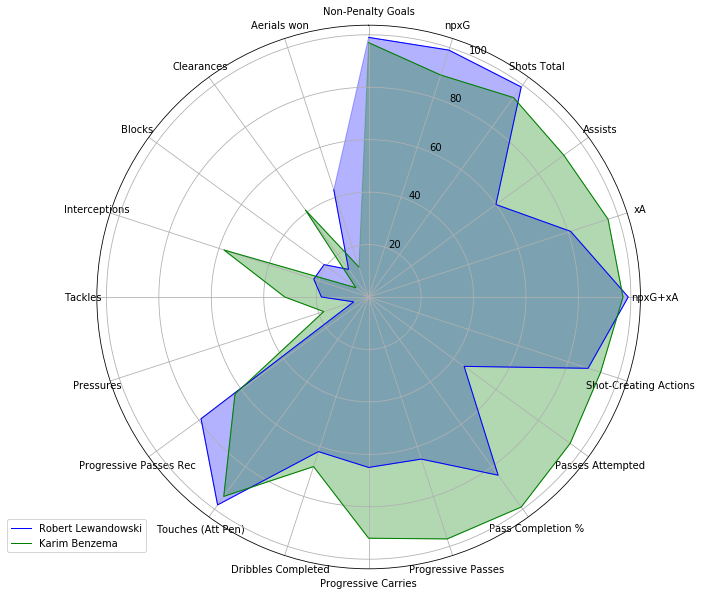

In [71]:
compare_players_percentile("https://fbref.com/en/players/8d78e732/Robert-Lewandowski", "https://fbref.com/en/players/70d74ece/Karim-Benzema")

In [27]:
def generate_squadlist(url):    
    html = requests.get(url).text
    data = BeautifulSoup(html, 'html5')
    table = data.find('table')
    cols = []

    for header in table.find_all('th'):
        cols.append(header.string)

    columns = cols[8:37] #gets necessary column headers
    players = cols[37:-2]

    #display(columns)
    rows = [] #initliaze list to store all rows of data
    for rownum, row in enumerate(table.find_all('tr')): #find all rows in table
        if len(row.find_all('td')) > 0: 
            rowdata = [] #initiliaze list of row data
            for i in range(0,len(row.find_all('td'))): #get all column values for row
                rowdata.append(row.find_all('td')[i].text)
            rows.append(rowdata)
    df = pd.DataFrame(rows, columns=columns)

    df.drop(df.tail(2).index,inplace=True)
    df["Player"] = players
    df.drop('Matches', axis=1, inplace=True)
    df['Nation'] = df['Nation'].str[3:]
    df.set_index("Player")

    return df 



In [292]:
def team_fixture_data(url):
    url = "https://fbref.com/en/squads/922493f3/2021-2022/matchlogs/all_comps/schedule/Atalanta-Scores-and-Fixtures-All-Competitions"
    page = urlopen(url).read()
    soup = BeautifulSoup(page)
    count = 0 
    table = soup.find("tbody")

    pre_df = dict()
    features_wanted =  {"date" , "time","comp","Round","dayofweek", "venue","result","goals_for","goals_against","opponent","xg_for","xg_against","possession","attendance","captain", "formation","referee"} #add more features here!!
    rows = table.find_all('tr')
    for row in rows:
        for f in features_wanted:
            if (row.find('th', {"scope":"row"}) != None) & (row.find("td",{"data-stat": f}) != None):
                cell = row.find("td",{"data-stat": f})
                a = cell.text.strip().encode()
                text=a.decode("utf-8")
                if f in pre_df:
                    pre_df[f].append(text)
                else:
                    pre_df[f]=[text]
                
    df = pd.DataFrame.from_dict(pre_df)
    return df 

In [290]:
def generate_fixture_data(x):
    url = x
    page = urlopen(url).read()
    soup = BeautifulSoup(page)
    count = 0 
    table = soup.find("tbody")

    pre_df = dict()
    features_wanted =  {"Date" , "time","comp","Round","dayofweek", "venue","result","goals_for","goals_against","opponent","xg_for","xg_against","possession","attendance","captain", "formation","referee"} #add more features here!!
    rows = table.find_all('tr')
    for row in rows:
        for f in features_wanted:
            if (row.find('th', {"scope":"row"}) != None) & (row.find("td",{"data-stat": f}) != None):
                cell = row.find("td",{"data-stat": f})
                a = cell.text.strip().encode()
                text=a.decode("utf-8")
                if f in pre_df:
                    pre_df[f].append(text)
                else:
                    pre_df[f]=[text]
                
    df = pd.DataFrame.from_dict(pre_df)
    return df 

In [294]:
df = team_fixture_data(url)

In [264]:
def generate_league_data(x):
    url = x
    page = urlopen(url).read()
    soup = BeautifulSoup(page)
    count = 0 
    table = soup.find("tbody")

    pre_df = dict()
    features_wanted =  {"squad" , "games","wins","draws","losses", "goals_for","goals_against", "points", "xg_for","xg_against","xg_diff","attendance","xg_diff_per90", "last_5"} #add more features here!!
    rows = table.find_all('tr')
    for row in rows:
        for f in features_wanted:
            if (row.find('th', {"scope":"row"}) != None) & (row.find("td",{"data-stat": f}) != None):
                cell = row.find("td",{"data-stat": f})
                a = cell.text.strip().encode()
                text=a.decode("utf-8")
                if f in pre_df:
                    pre_df[f].append(text)
                else:
                    pre_df[f]=[text]
                
    df = pd.DataFrame.from_dict(pre_df)
    df["games"] = pd.to_numeric(df["games"])
    df["xg_diff_per90"] = pd.to_numeric(df["xg_diff_per90"])
    df["minutes_played"] = df["games"] *90
    return(df)

In [265]:
df = generate_league_data("https://fbref.com/en/comps/9/Premier-League-Stats")
df['path'] = df["squad"] + '.png'
df[["squad","xg_for","xg_against", "path"]]

,losses,goals_against,draws,xg_diff_per90,points,xg_for,squad,xg_against,last_5,xg_diff,games,goals_for,wins,minutes_played
0,3,18,3,+1.58,69,64.7,Manchester City,20.4,W W L W W,+44.3,28,68,22,2520
1,2,20,6,+1.58,66,71.2,Liverpool,27.1,W W W W W,+44.2,28,73,20,2520
2,3,19,8,+0.78,59,46.7,Chelsea,24.8,W W W W W,+21.9,28,57,17,2520
3,7,29,3,+0.31,51,41.2,Arsenal,33.0,W W W W W,+8.2,26,43,16,2340
4,7,40,8,+0.12,50,44.8,Manchester Utd,41.3,W W D L W,+3.6,29,48,14,2610
5,9,36,6,+0.13,48,40.0,West Ham,36.2,D D W L W,+3.9,29,48,14,2610
6,11,23,4,-0.43,46,27.9,Wolves,40.5,L L L W W,-12.6,29,29,14,2610
7,10,35,3,+0.46,45,43.7,Tottenham,31.4,W L W W L,+12.3,27,42,14,2430
8,14,39,3,-0.11,36,32.2,Aston Villa,35.2,L W W W L,-3.0,28,41,11,2520
9,10,45,11,-0.07,35,39.3,Southampton,41.4,W W L L L,-2.0,29,36,8,2610


In [269]:
def p90_Calculator(variable_value, minutes_played):
    
    variable_value = pd.to_numeric(variable_value)
    
    ninety_minute_periods = minutes_played/90
    
    p90_value = variable_value/ninety_minute_periods
    
    return p90_value

def form_ppg_calc(variable_value):
    wins = variable_value.count("W")
    draws = variable_value.count("D")
    losses = variable_value.count("L")
    points = (wins*3) + (draws)
    ppg = points/5
    return ppg

def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)


In [272]:
df['xG_p90'] = df.apply(lambda x: p90_Calculator(x['xg_for'], x['minutes_played']), axis=1)
df['xGA_p90'] = df.apply(lambda x: p90_Calculator(x['xg_against'], x['minutes_played']), axis=1)
df['ppg_form'] = df.apply(lambda x: form_ppg_calc(x['last_5']), axis=1)

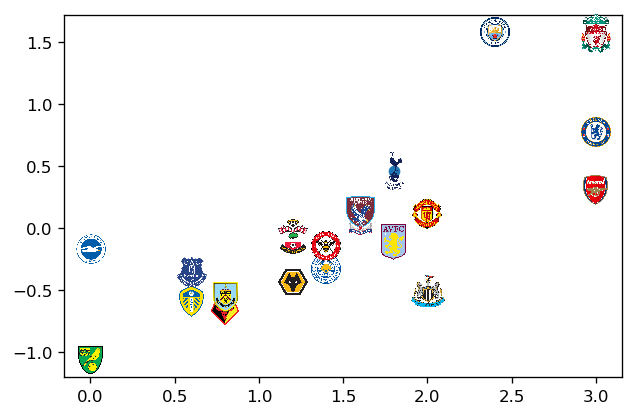

In [288]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.scatter(df["ppg_form"], df["xg_diff_per90"])

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(os.path.join("team_logos/"+row["path"])), (row["ppg_form"], row["xg_diff_per90"]), frameon=False)
    ax.add_artist(ab)

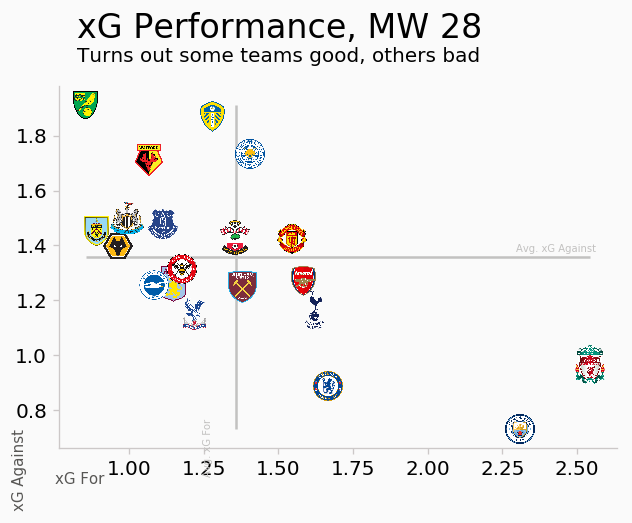

In [280]:
# Set font and background colour
plt.rcParams.update({'font.family':'Avenir'})
bgcol = '#fafafa'

# Create initial plot
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
fig.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.scatter(df['xG_p90'], df['xGA_p90'], c=bgcol)

# Change plot spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# Change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(os.path.join("team_logos/"+row["path"])), (row['xG_p90'], row['xGA_p90']), frameon=False)
    ax.add_artist(ab)

# Add average lines
plt.hlines(df['xGA_p90'].mean(), df['xG_p90'].min(), df['xG_p90'].max(), color='#c2c1c0')
plt.vlines(df['xG_p90'].mean(), df['xGA_p90'].min(), df['xGA_p90'].max(), color='#c2c1c0')

# Text

## Title & comment
fig.text(.15,.98,'xG Performance, MW 28',size=20)
fig.text(.15,.93,'Turns out some teams good, others bad', size=12)

## Avg line explanation
fig.text(.06,.14,'xG Against', size=9, color='#575654',rotation=90)
fig.text(.12,0.05,'xG For', size=9, color='#575654')

## Axes titles
fig.text(.76,.535,'Avg. xG Against', size=6, color='#c2c1c0')
fig.text(.325,.17,'Avg. xG For', size=6, color='#c2c1c0',rotation=90)

## Save plot
plt.savefig('xGChart.png', dpi=1200, bbox_inches = "tight")

In [295]:
df

,venue,goals_against,captain,opponent,result,xg_for,attendance,xg_against,referee,comp,dayofweek,time,goals_for,formation,possession
0,Away,1,José Luis Palomino,Torino,W,1.0,"3,475",1.3,Daniele Chiffi,Serie A,Sat,20:45,2,3-4-3,53
1,Home,0,Rafael Tolói,Bologna,D,1.0,"7,912",0.3,Daniele Orsato,Serie A,Sat,18:30,0,3-4-3,59
2,Home,2,Rafael Tolói,Fiorentina,L,2.5,"9,162",1.7,Valerio Marini,Serie A,Sat,20:45,1,3-4-3,55
3,Away,2,Rafael Tolói,es Villarreal,D,1.2,"12,916",2.1,Clément Turpin,Champions Lg,Tue,21:00,2,3-4-3,53
4,Away,0,Rafael Tolói,Salernitana,W,1.4,"11,949",0.9,Paolo Valeri,Serie A,Sat,20:45,1,3-4-3,57
5,Home,1,Rafael Tolói,Sassuolo,W,1.6,"7,353",0.7,Davide Massa,Serie A,Tue,20:45,2,3-4-1-2,47
6,Away,2,Rafael Tolói,Inter,D,2.1,"36,517",3.9,Fabio Maresca,Serie A,Sat,18:00,2,3-4-1-2,50
7,Home,0,Rafael Tolói,ch Young Boys,W,2.1,"8,536",0.1,Felix Brych,Champions Lg,Wed,18:45,1,3-4-3,63
8,Home,3,Remo Freuler,Milan,L,2.1,"9,363",3.0,Marco Di Bello,Serie A,Sun,20:45,2,3-4-1-2,56
9,Away,1,Rafael Tolói,Empoli,W,4.2,"6,214",0.7,Marco Serra,Serie A,Sun,15:00,4,3-4-1-2,52


In [328]:
df = df.drop(df[df.captain == ""].index)
df.loc[(df['comp'] == 'Serie A')]
def points_calc(variable_value):
    if variable_value == "W": 
        points = 3
    elif variable_value == "D":
        points = 1
    else:
        points = 0
    return points 
df['points'] = df.apply(lambda x: points_calc(x['result']), axis=1)
df_pivot = pd.pivot_table(df, values='points', columns='formation',
                          aggfunc='sum')

In [329]:
df_pivot

formation,3-4-1-2,3-4-3,4-2-3-1,4-3-3
points,15,47,3,1


Event_time,Mon 20:50,Sat 15:00,Sat 18:00,Sat 18:30,Sat 20:45,Sun 12:30,Sun 15:00,Sun 16:30,Sun 18:00,Sun 20:45,...,Thu 19:00,Thu 19:45,Thu 21:00,Tue 18:30,Tue 20:45,Tue 21:00,Wed 17:30,Wed 18:30,Wed 18:45,Wed 20:00
points,3,4,4,1,13,1,6,3,1,2,...,0,3,6,3,4,3,3,3,3,0


In [304]:
test = df.groupby(event_times)[["result"]].count()

In [305]:
test

,result
Mon 20:50,1
Sat 15:00,3
Sat 18:00,3
Sat 18:30,1
Sat 20:45,6
Sun 12:30,3
Sun 15:00,2
Sun 16:30,1
Sun 18:00,1
Sun 20:45,3


AttributeError: Unknown property xlabel

/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


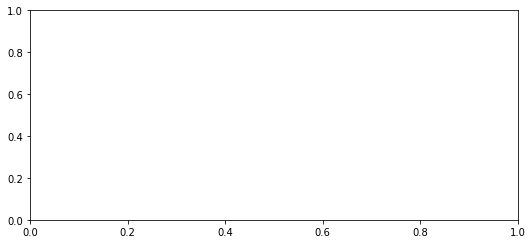

In [300]:
labels = event_times
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
# url = "https://fbref.com/en/comps/9/Premier-League-Stats"
# data  = requests.get(url).text
# soup = BeautifulSoup(data)
# player_urls = []
# links = BeautifulSoup(data).select('th a')
# urls = [link['href'] for link in links]
# # print(urls)
# for y in urls:
#     url = "https://fbref.com/"+y
#     data  = requests.get(url).text
#     soup = BeautifulSoup(data)
#     links = BeautifulSoup(data).select('th a')
#     urls = [link['href'] for link in links]
#     player_urls.append(urls)
#     player_urls  = [item for sublist in player_urls  for item in sublist]
#     player_urls_full = []
#     for x in range(len(player_urls)):
#         player_urls_full.append("https://fbref.com/"+ str(player_urls[x]))
        
# for y in urls:
#     url = "https://fbref.com/"+y
#     html  = requests.get(url).text
#     data = BeautifulSoup(html, 'html5')
#     table = data.find('table')
#     cols = []

#     for header in table.find_all('th'):
#         cols.append(header.string)

#     columns = cols[9:11] #gets necessary column headers
#     players = cols[37:-2]

#     #display(columns)
#     rows = [] #initliaze list to store all rows of data
#     for rownum, row in enumerate(table.find_all('tr')): #find all rows in table
#         if len(row.find_all('td')) > 0: 
#             rowdata = [] #initiliaze list of row data
#             for i in range(0,len(row.find_all('td'))): #get all column values for row
#                 rowdata.append(row.find_all('td')[i].text)
#             rows.append(rowdata)
# df = pd.DataFrame(rows, columns=columns)

# url_df = pd.DataFrame({"col":player_urls_full})

# all_data = pd.concat([url_df, df], axis = 1)

In [4]:
from   selenium import webdriver
from   selenium.webdriver.chrome.options import Options
from   selenium.webdriver.common.by import By
# from   webdriver_manager.chrome import ChromeDriverManager

In [3]:
from   webdriver_manager.chrome import ChromeDriverManager

ModuleNotFoundError: No module named 'webdriver_manager'

In [ ]:
# get similar players
warnings.filterwarnings("ignore")
url = "https://fbref.com/en/players/1544f145/scout/365_euro/Jacob-Ramsey-Scouting-Report"
page =requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
name = [element.text for element in soup.find_all("span")]
name = name[7]
metric_names = []
metric_values = []
# remove_content = ["'", "[", "]", ","]
for row in soup.findAll('table')[0].tbody.findAll('tr'):
    first_column = row.findAll('th')[0].contents
    metric_names.append(first_column)
for row in soup.findAll('table')[1].tbody.findAll('tr'):
    first_column = row.findAll('td')[0].contents
    metric_values.append(first_column)
metric_values = repr(metric_values)
# for content in remove_content:
#     metric_values = metric_values.replace(content, '')